In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

https://www.accuweather.com/

task1

In [3]:
new_york = np.array([2.13, 4.15, 7.53, 10.38, 12.06, 16.37, 21.13, 21.82, 19.57, 14.64, 10.38, 5.26])
jakarta = np.array([31.8, 31.9, 31.6, 33.2, 33.0, 32.5, 32.3, 32.6, 33.0, 34.4, 33.5, 31.8])

yakutsk = np.array([-38.69, -32.64, -19.21, -5.42, 9.39, 17.16, 20.79, 15.26, 6.41, -6.58, -23.12, -33.81], dtype=int)

cities = np.array([new_york, jakarta, yakutsk], dtype=int)

overall_mean = np.mean(cities)
overall_std = np.std(cities)
mean_per_city = np.mean(cities, axis=1)
std_per_city = np.std(cities, axis=1)

print("=== Statistical Insights ===")
print(f"Overall Mean Temperature: {overall_mean:.2f}°C")
print(f"Overall Standard Deviation: {overall_std:.2f}")

print("\nMean Temperature per City:")
print(f"New York: {mean_per_city[0]:.2f}°C")
print(f"Jakarta: {mean_per_city[1]:.2f}°C")
print(f"Yukutsk: {mean_per_city[2]:.2f}°C")

print("\nStandard Deviation per City:")
print(f"New York: {std_per_city[0]:.2f}")
print(f"Jakarta: {std_per_city[1]:.2f}")
print(f"Yukutsk: {std_per_city[2]:.2f}")


=== Statistical Insights ===
Overall Mean Temperature: 12.17°C
Overall Standard Deviation: 20.26

Mean Temperature per City:
New York: 11.75°C
Jakarta: 32.17°C
Yukutsk: -7.42°C

Standard Deviation per City:
New York: 6.30
Jakarta: 0.99
Yukutsk: 20.16


$\sigma = \sqrt{\frac{1}{36} \sum_{i,j} (T_{ij} - \overline{T})^2}$

$\overline{T} = \frac{1}{36} \sum_{i,j} T_{ij}$

$\overline{T_i} = \frac{1}{12} \sum_{j=1}^{12} T_{ij}$

task2

In [4]:
def draw_box(x, y, size, r, g, b):
    for i in range(int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

In [5]:
new_york = np.array([2.13, 4.15, 7.53, 10.38, 12.06, 16.37, 21.13, 21.82, 19.57, 14.64, 10.38, 5.26],dtype=int)
jakarta = np.array([31.8, 31.9, 31.6, 33.2, 33.0, 32.5, 32.3, 32.6, 33.0, 34.4, 33.5, 31.8],dtype=int)

yakutsk = np.array([-38.69, -32.64, -19.21, -5.42, 9.39, 17.16, 20.79, 15.26, 6.41, -6.58, -23.12, -33.81], dtype=int)

cities = np.array([new_york, jakarta, yakutsk], dtype=int)

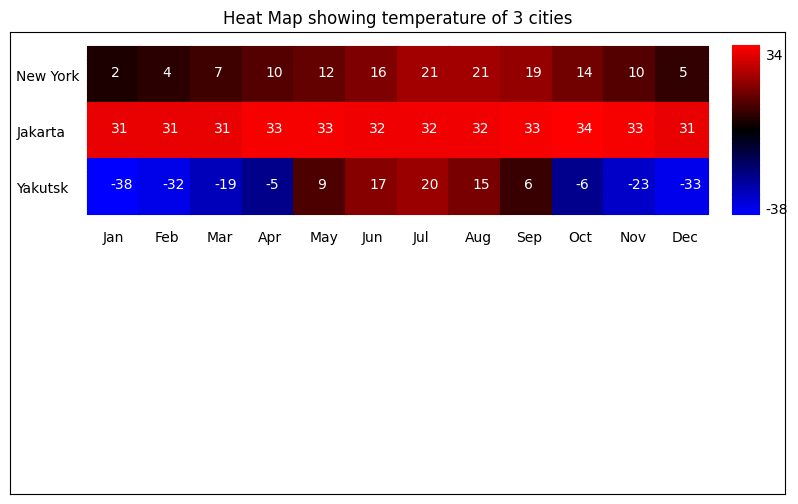

In [8]:
def draw_box(x, y, size, r, g, b):
    for i in range(int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

Min = np.min(cities)
Max = np.max(cities)

fig = plt.figure(figsize=(10, 6))
plt.axis([0, 600, 20, 350])
plt.xticks([])
plt.yticks([])

BoxSize = int(40)
OffsetX = int(18)
OffsetY = int(18)

for i in range(cities.shape[0]):
    for j in range(cities.shape[1]):
        temp = cities[i, j]
        normalized_temp = (temp - Min) / (Max - Min)
        if normalized_temp < 0.5:
            r = 0
            g = 0
            b = int((1 - normalized_temp) * 255)
        elif normalized_temp == 0.5:
            r = 0
            g = 0
            b = 0
        else:
            r = int((normalized_temp - 0.5) * 510)
            g = 0
            b = 0
        draw_box(60 + BoxSize * j, 300 - BoxSize * i, BoxSize, r, g, b)
        plt.text(OffsetX + 60 + BoxSize * j, OffsetY + 300 - BoxSize * i, str(cities[i, j]), color='#FFFFFF')

num_steps = 100
scale_height = BoxSize * cities.shape[0]
scale_y_start = 300 - scale_height + 40

for i in range(0, num_steps):
    normalized_i = i / (num_steps - 1)
    if normalized_i < 0.5:
        r = 0
        g = 0
        b = int((1 - normalized_i * 2) * 255)
    elif normalized_i == 0.5:
        r = 0
        g = 0
        b = 0
    else:
        r = int((normalized_i - 0.5) * 2 * 255)
        g = 0
        b = 0
    plt.plot([60 + BoxSize * cities.shape[1] + 20, 60 + BoxSize * cities.shape[1] + 40],
             [scale_y_start + (scale_height * i) / (num_steps - 1), scale_y_start + (scale_height * i) / (num_steps - 1)],
             '#{:02x}{:02x}{:02x}'.format(r, g, b))

plt.text(60 + BoxSize * cities.shape[1] + 45, scale_y_start, str(Min))
plt.text(60 + BoxSize * cities.shape[1] + 45, scale_y_start + scale_height - 10, str(Max))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_y_position = 300 - BoxSize * cities.shape[0] + 20
for i, month in enumerate(months):
    plt.text(72 + 40 * i, months_y_position, month)

cities_names = ['New York', 'Jakarta', 'Yakutsk']
for i, city in enumerate(cities_names):
    plt.text(5, 315 - 40 * i, city)

plt.title("Heat Map showing temperature of 3 cities")
plt.show()

fig.savefig("heat_map.jpg")
plt.close()

$\text{normalized\_temp} = \frac{\text{temp} - \text{Min}}{\text{Max} - \text{Min}}$

task3

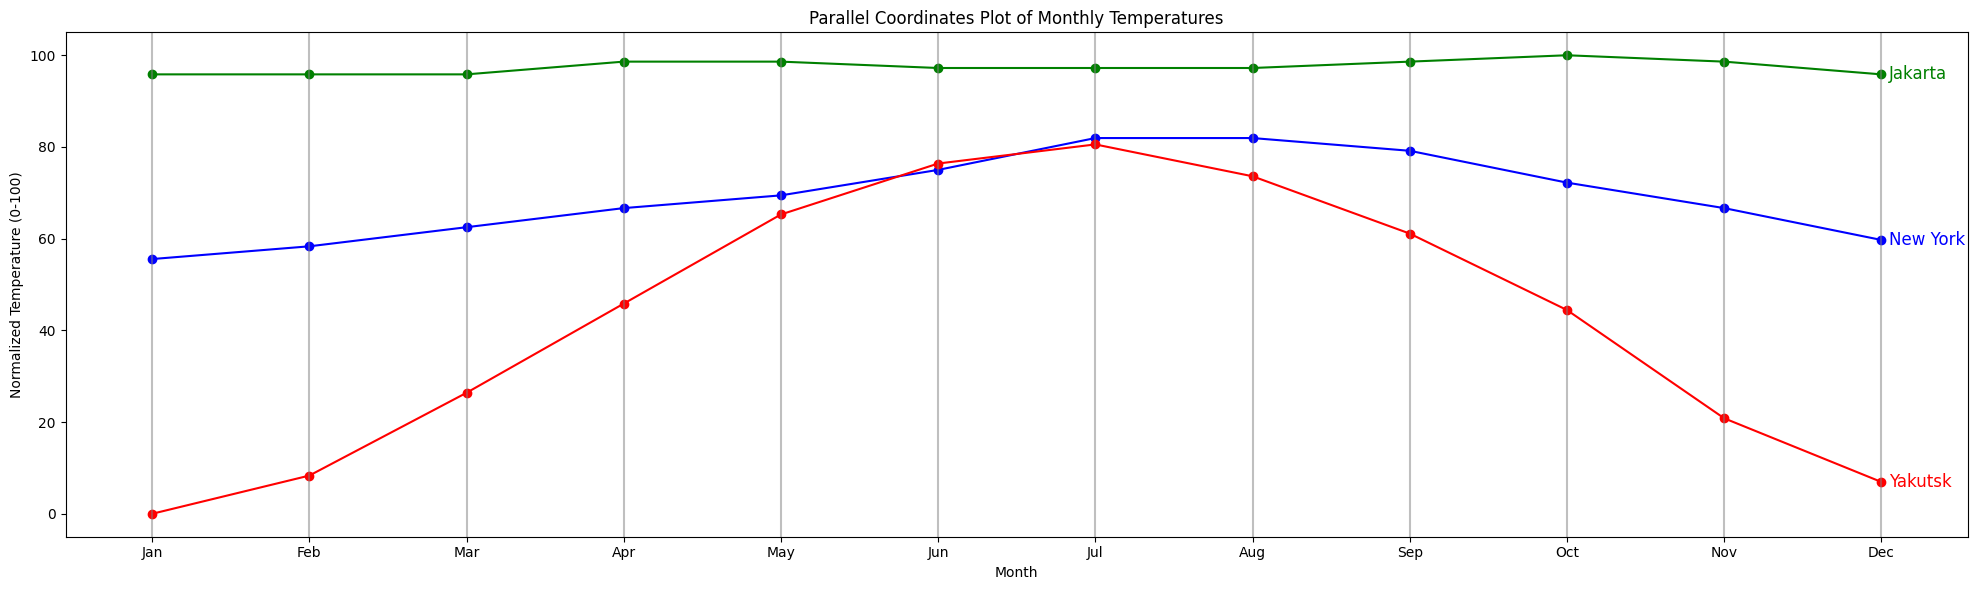

In [7]:
new_york = np.array([2.13, 4.15, 7.53, 10.38, 12.06, 16.37, 21.13, 21.82, 19.57, 14.64, 10.38, 5.26], dtype=int)
jakarta = np.array([31.8, 31.9, 31.6, 33.2, 33.0, 32.5, 32.3, 32.6, 33.0, 34.4, 33.5, 31.8], dtype=int)
yakutsk = np.array([-38.69, -32.64, -19.21, -5.42, 9.39, 17.16, 20.79, 15.26, 6.41, -6.58, -23.12, -33.81], dtype=int)

Cities = np.array([new_york, jakarta, yakutsk], dtype=int)
city_names = ["New York", "Jakarta", "Yakutsk"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Min = np.min(Cities)
Max = np.max(Cities)
NormalizedData = (Cities - Min) / (Max - Min) * 100

fig, ax = plt.subplots(figsize=(20, 6))
colors = ['blue', 'green', 'red']

for i, city in enumerate(NormalizedData):
    ax.plot(months, city, marker='o', linestyle='-', color=colors[i])
    ax.text(len(months) - 0.95, city[len(months) - 1], city_names[i], color=colors[i], fontsize=12,
            verticalalignment='center', horizontalalignment='left')

for month in months:
    ax.axvline(x=month, color='gray', linestyle='-', alpha=0.5)

ax.set_ylabel("Normalized Temperature (0-100)")
ax.set_xlabel("Month")
ax.set_title("Parallel Coordinates Plot of Monthly Temperatures")

plt.tight_layout()
plt.show()

fig.savefig("parallel_coordinates_task3.jpg", bbox_inches='tight')
plt.close()


$$\overline{T_i}= \dfrac{\displaystyle\sum_{j=1}^{12} T_{ij}}{12}$$